# Arctic PUFF Statistics (JPL-MUR vs 3 Arctic Pop-up Floats)

Floats deployed in 2018 - and popped up in the summer of 2019

- for fun, compare underice (4m) with retrievals?

In [20]:
from erddapy import ERDDAP
import xarray as xa
import pandas as pd
import numpy as np

In [42]:
server_url='http://akutan.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

dfpuff={}
for dataset_id in ['2019_PopUP_300434063823800_sst_data',
                   '2019_PopUP_300434063823800_irridium_position',
                   '2019_PopUP_300434063928220_sst_data',
                   '2019_PopUP_300434063928220_irridium_position',
                   '2019_PopUP_300434063921240_sst_data',
                   '2019_PopUP_300434063921240_irridium_position']:
    print(f'{dataset_id}')
    try:
        e = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        e.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))
        continue
    try:
        dftemp = e.to_pandas(
                            index_col='time (UTC)',
                            parse_dates=True,
                            skiprows=(1,)  # units information can be dropped.
                            )
        dftemp.columns = [x[1].split()[0] for x in enumerate(dftemp.columns)]

        ##resample as daily data 
        dfpuff.update({dataset_id: dftemp})
    except:
        pass

2019_PopUP_300434063823800_sst_data
2019_PopUP_300434063823800_irridium_position
2019_PopUP_300434063928220_sst_data
2019_PopUP_300434063928220_irridium_position
2019_PopUP_300434063921240_sst_data
2019_PopUP_300434063921240_irridium_position


In [43]:
dfpuff_daily = dfpuff['2019_PopUP_300434063823800_sst_data'].resample('3H').mean().dropna(how='any', subset=['latitude'])
dfpuff_daily.rename(columns={'latitude':'dep_lat','longitude':'dep_lon'},inplace=True)
dfpuff_loc_daily = dfpuff['2019_PopUP_300434063823800_irridium_position'].resample('3H').mean().interpolate()

dfpuff_merge = pd.concat([dfpuff_daily,dfpuff_loc_daily],axis=1)
dfpuff_merge = dfpuff_merge[dfpuff_merge.index.hour==9].dropna(how='any',subset=['latitude'])


In [44]:
dfpuff_merge

timeseries_id   dep_lat     dep_lon  pressure  \
time (UTC)                                                                 
2019-05-07 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.055389   
2019-05-08 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.053101   
2019-05-09 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.059248   
2019-05-10 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.056051   
2019-05-11 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.071411   
...                                  ...       ...         ...       ...   
2019-09-01 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.045624   
2019-09-02 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.036011   
2019-09-03 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.036926   
2019-09-04 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.044556   
2019-09-05 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.046692   

                           topside_temp  topside_temp_ADC  underside_temp  \
time (UTC)                                                                  
2019-05-07 09:00:00+00:00     -2.494635          31531.75       -1.663364   
2019-05-08 09:00:00+00:00     -3.058054          32459.00       -1.721270   
2019-05-09 09:00:00+00:00     -3.241597          32767.00       -1.715860   
2019-05-10 09:00:00+00:00     -3.241597          32767.00       -1.723989   
2019-05-11 09:00:00+00:00     -3.241597          32767.00       -1.732791   
...                                 ...               ...             ...   
2019-09-01 09:00:00+00:00      6.970124          19614.00        7.344175   
2019-09-02 09:00:00+00:00      7.034848          19551.00        7.425054   
2019-09-03 09:00:00+00:00      7.074801          19513.00        7.498283   
2019-09-04 09:00:00+00:00      6.257657          20307.00        7.206043   
2019-09-05 09:00:00+00:00      7.929080          18720.00        8.484642   

                           underside_temp_ADC     temp_ref        par  fluor  \
time (UTC)                                                                     
2019-05-07 09:00:00+00:00        30160.375000  8526.000000  55.618707    0.0   
2019-05-08 09:00:00+00:00        30250.111111  8526.000000  30.990008    0.0   
2019-05-09 09:00:00+00:00        30241.714286  8526.000000  37.100137    0.0   
2019-05-10 09:00:00+00:00        30254.333333  8525.333333  21.044087    0.0   
2019-05-11 09:00:00+00:00        30268.000000  8525.000000   0.562123    0.0   
...                                       ...          ...        ...    ...   
2019-09-01 09:00:00+00:00        19237.500000  8527.000000  14.014315    0.0   
2019-09-02 09:00:00+00:00        19162.000000  8527.000000  -0.116301    0.0   
2019-09-03 09:00:00+00:00        19094.000000  8527.000000  -0.116301    0.0   
2019-09-04 09:00:00+00:00        19367.000000  8527.000000  -0.116301    0.0   
2019-09-05 09:00:00+00:00        18204.000000  8527.000000  -0.116301    0.0   

                                tilt   latitude   longitude  CEPradius  
time (UTC)                                                              
2019-05-07 09:00:00+00:00   2.125000  70.774370 -167.099235   3.250000  
2019-05-08 09:00:00+00:00   1.222222  70.771166 -167.465275   3.375000  
2019-05-09 09:00:00+00:00   1.285714  70.769533 -168.001108   3.277778  
2019-05-10 09:00:00+00:00   1.333333  70.747941 -168.262737   4.478261  
2019-05-11 09:00:00+00:00   1.000000  70.698180 -168.541250   2.333333  
...                              ...        ...         ...        ...  
2019-09-01 09:00:00+00:00  19.000000  71.066850 -164.570490   9.000000  
2019-09-02 09:00:00+00:00  14.000000  71.188430 -165.047100   3.000000  
2019-09-03 09:00:00+00:00  22.000000  71.173725 -164.868292   2.750000  
2019-09-04 09:00:00+00:00   6.000000  71.147471 -164.728673   3.166667  
2019-09-05 09:00:00+00:00  18.000000  71.090480 -164.434440   3.000000  

[122 rows x 15 columns]

In [45]:
#mur files
sstfiles = '/Volumes/MobileSSD/in_and_outbox/data_sets/podaac_MUR/Arctic_lowres/'
mdf_lres = xa.open_mfdataset(sstfiles+'2019*.nc')

In [46]:
sstfiles = '/Volumes/MobileSSD/in_and_outbox/data_sets/podaac_MUR/Arctic_highres/3800/'
mdf_hres = xa.open_mfdataset(sstfiles+'2019*.nc')

/var/folders/vv/blq095kj0xj9nz1v0ffdwfch0000gp/T/ipykernel_69283/3528923844.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,figsize=(8, 6))


KeyError: '2019-9-06'

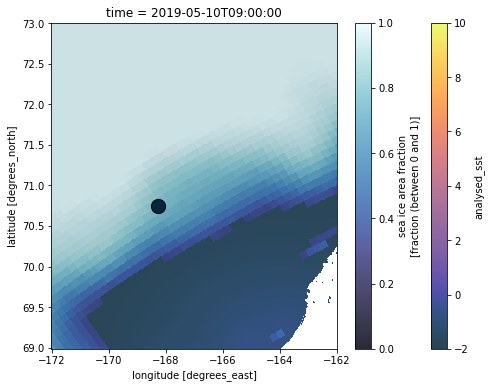

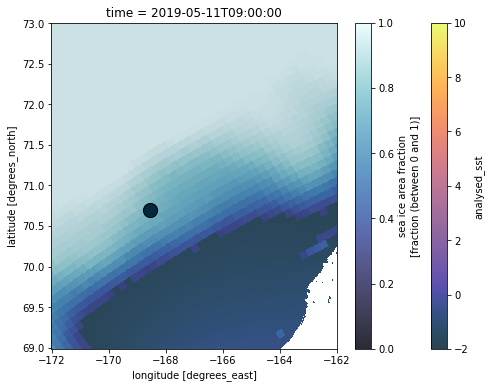

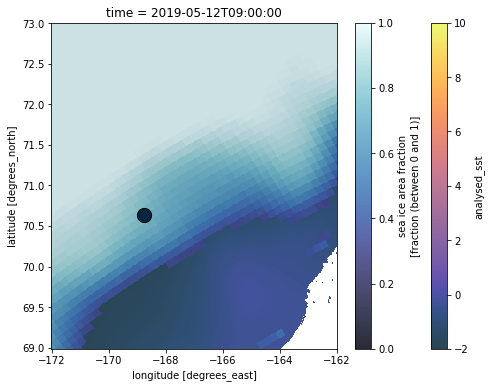

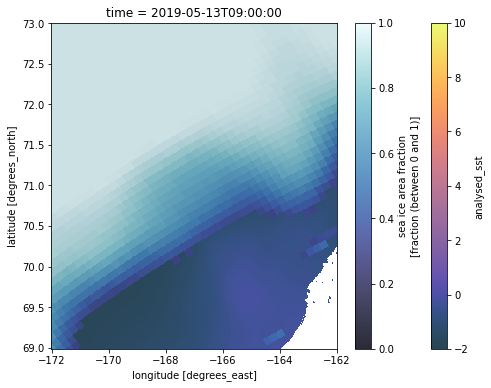

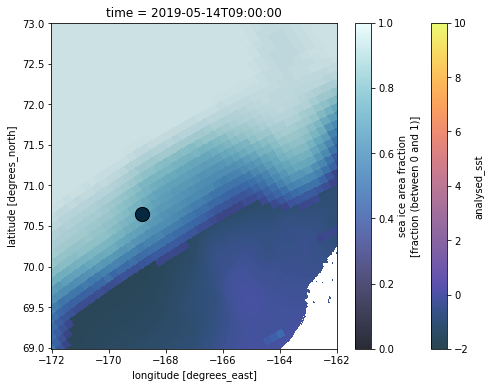

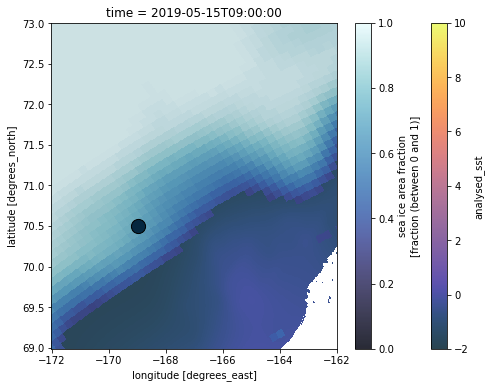

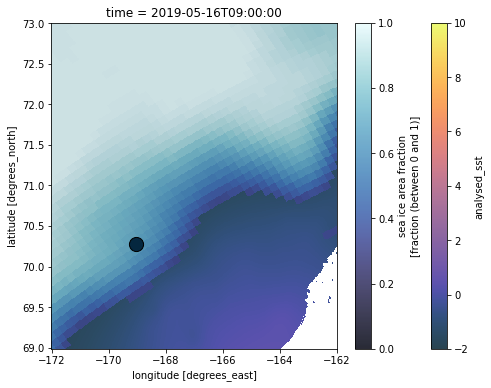

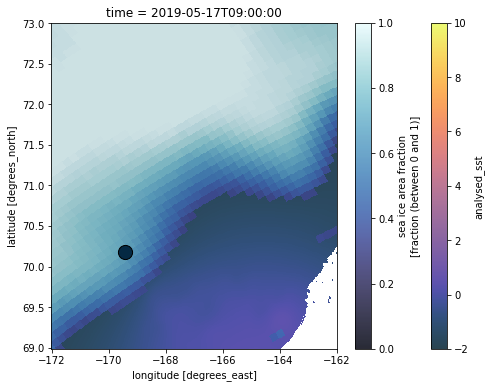

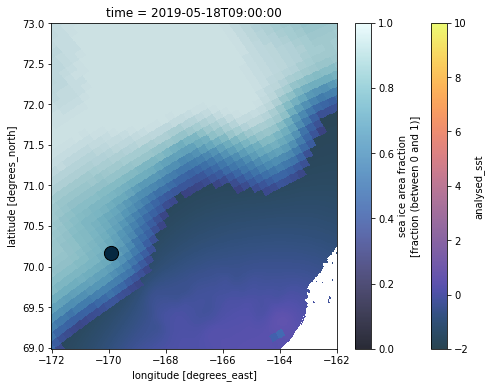

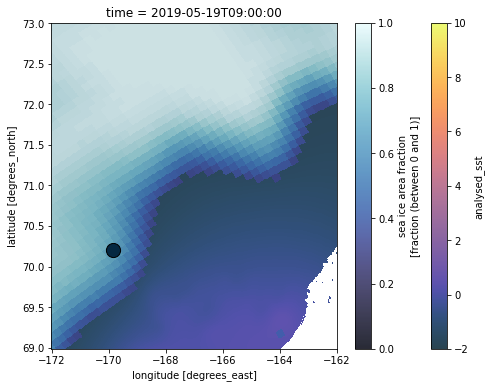

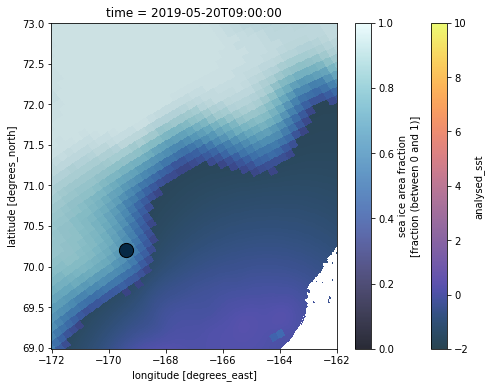

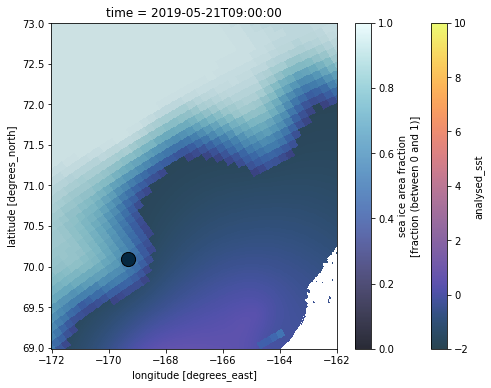

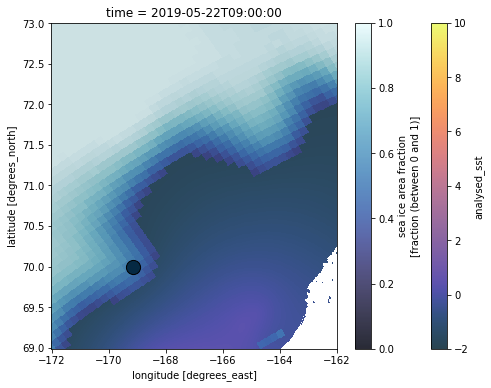

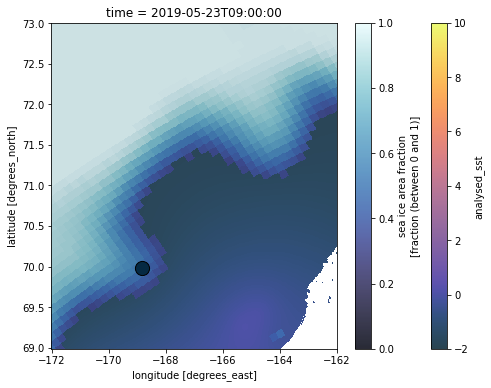

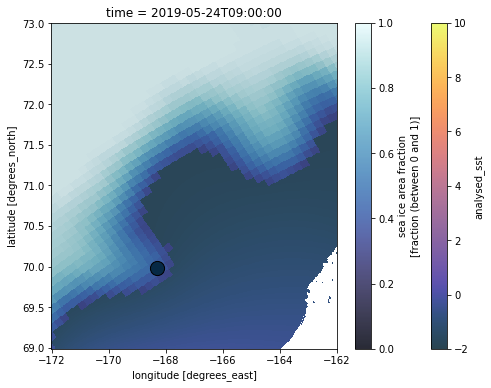

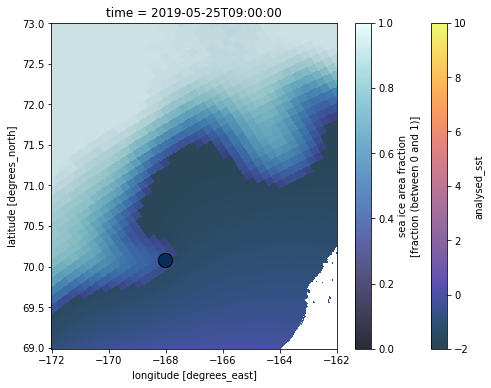

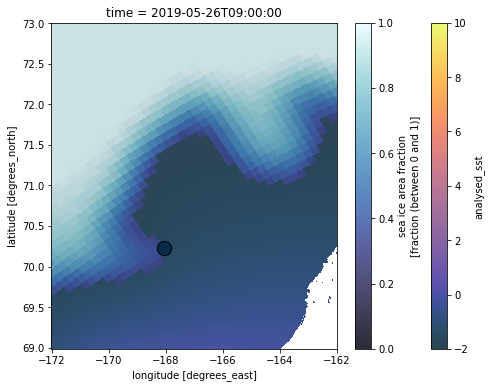

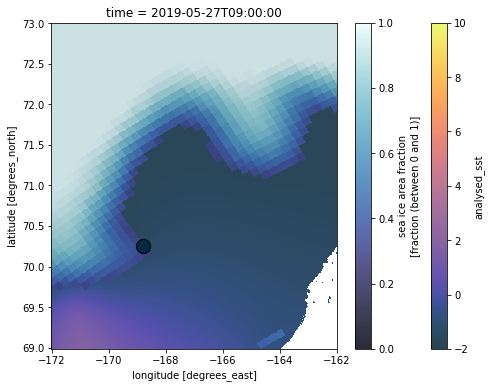

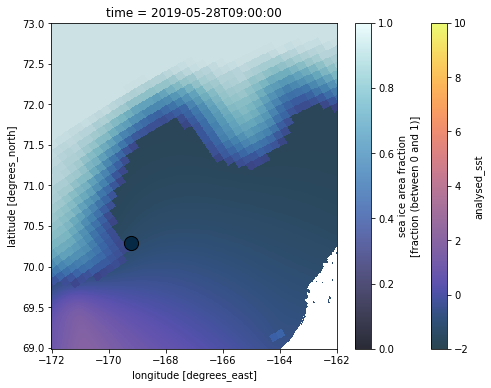

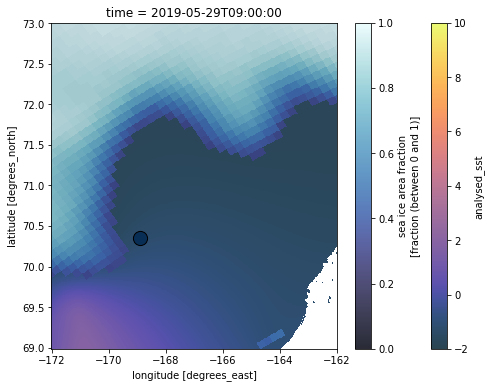

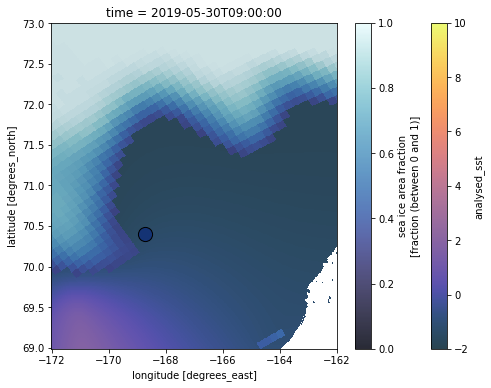

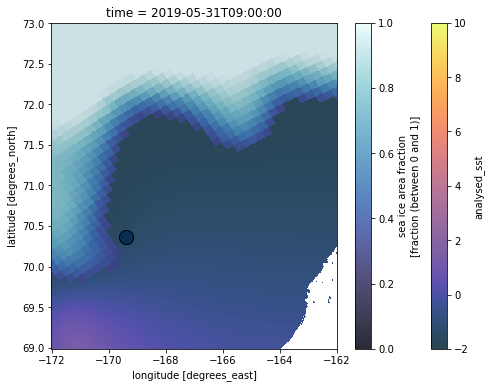

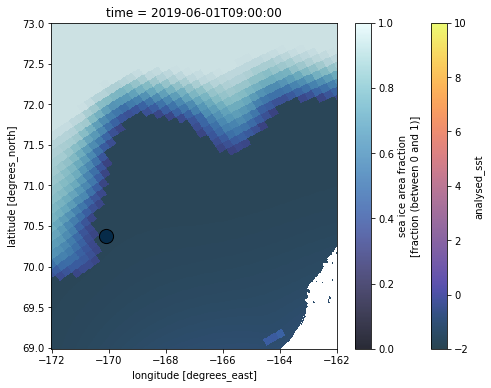

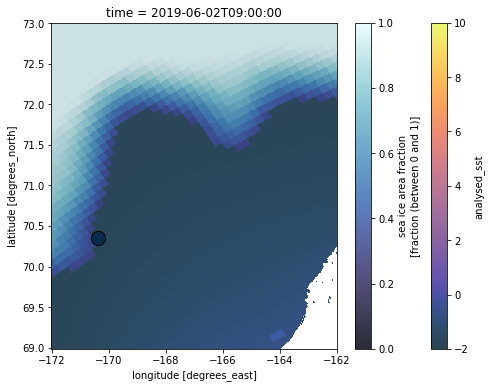

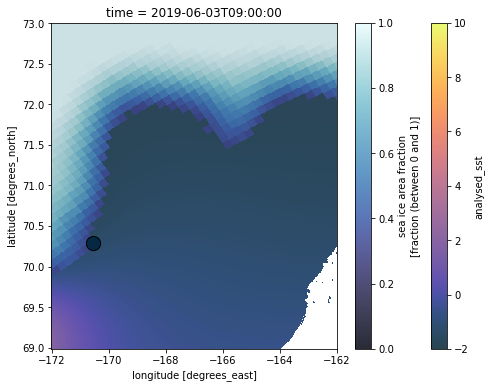

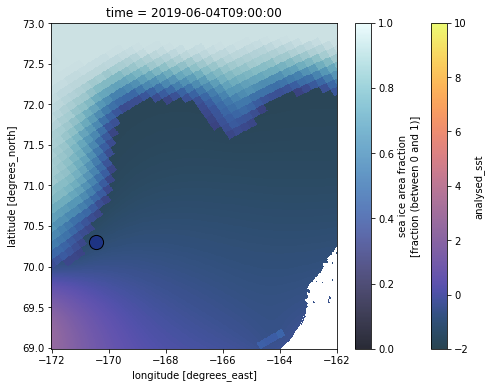

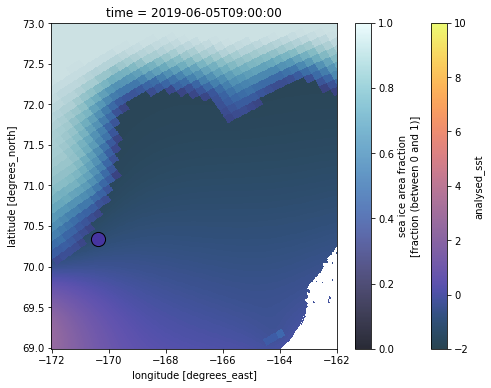

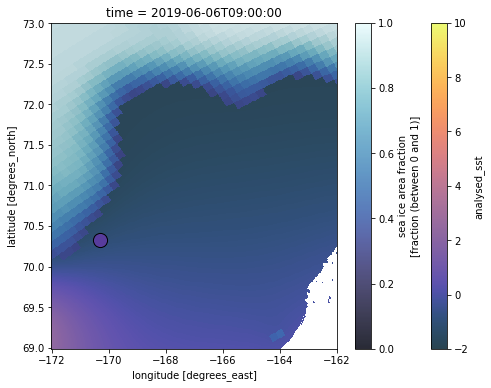

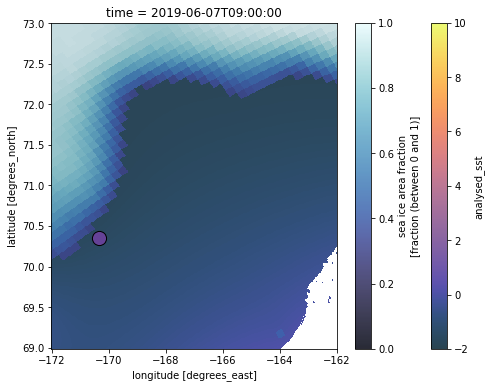

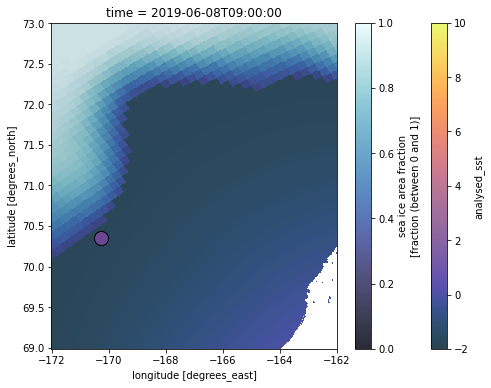

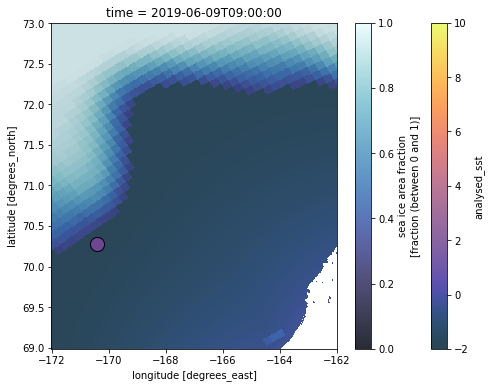

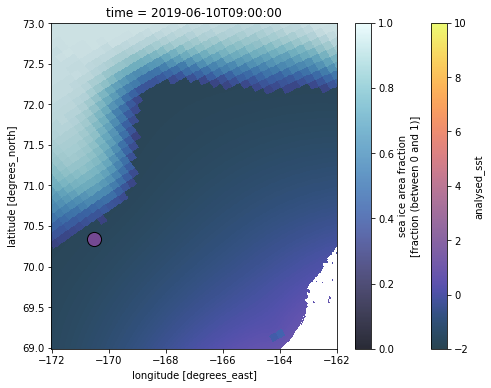

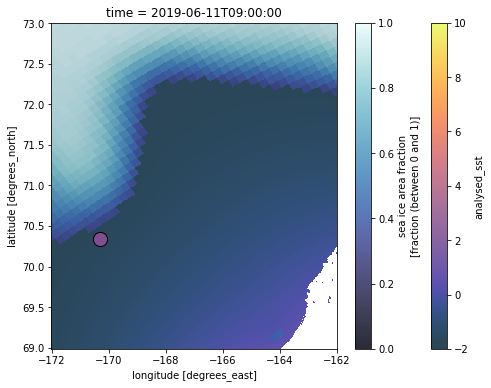

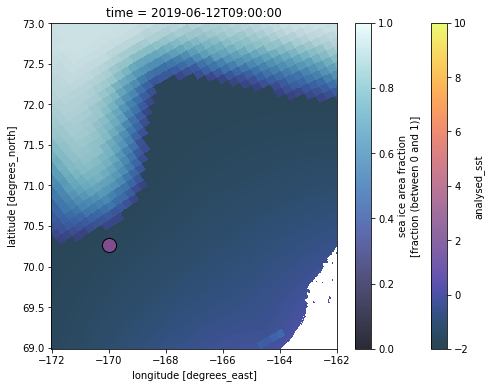

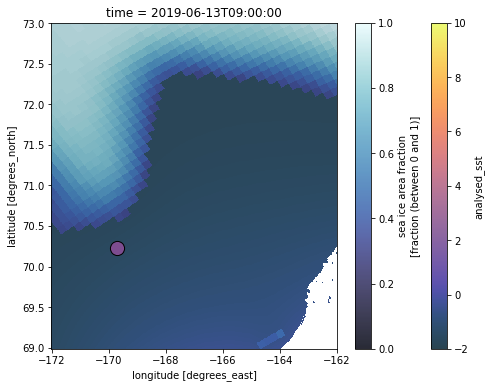

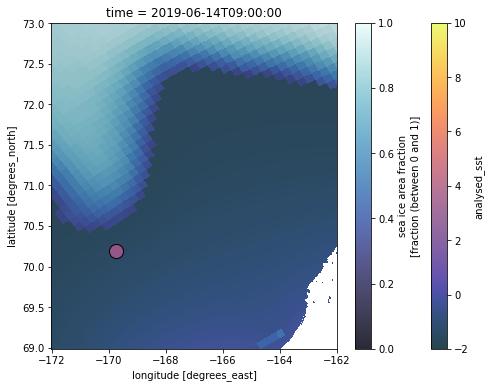

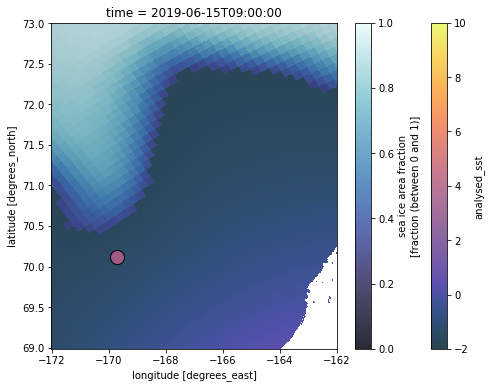

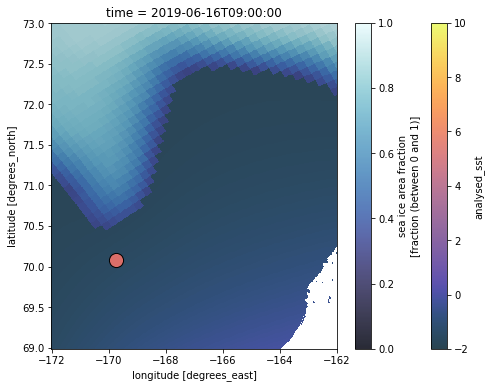

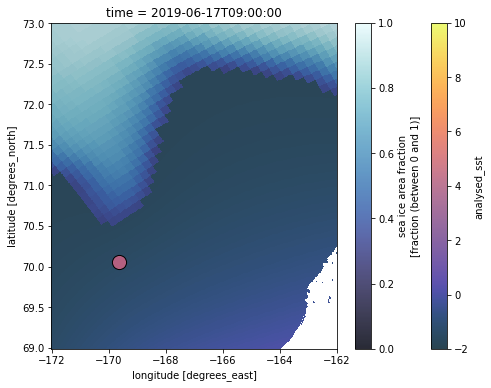

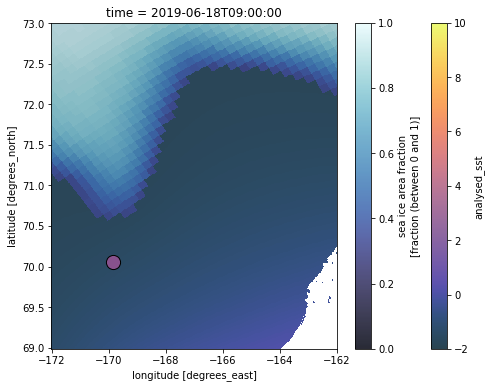

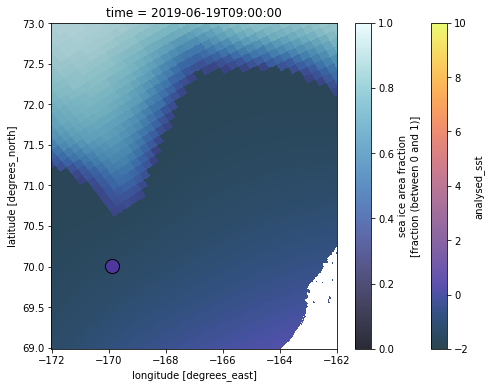

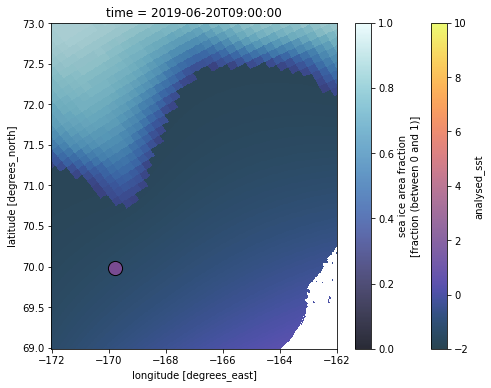

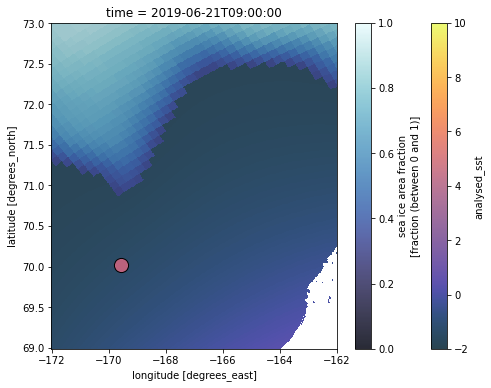

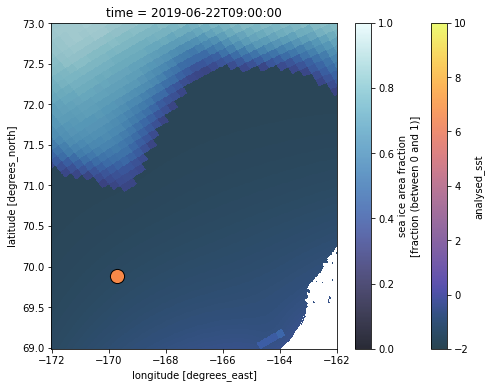

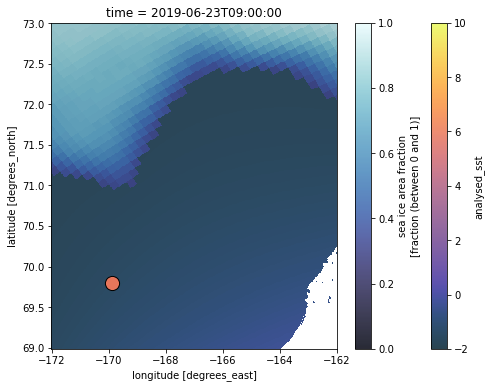

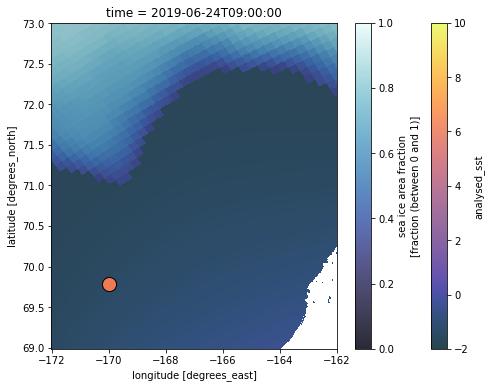

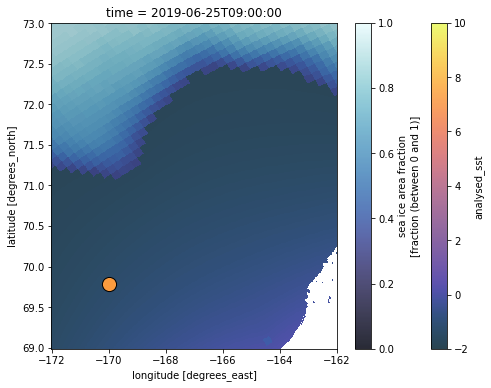

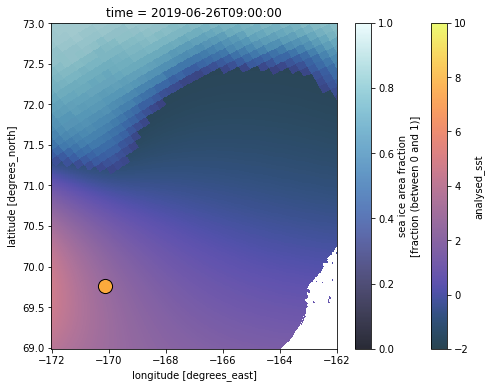

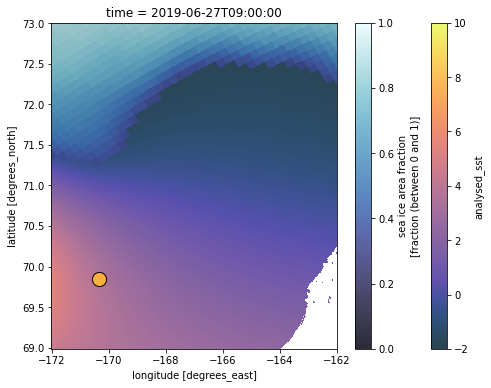

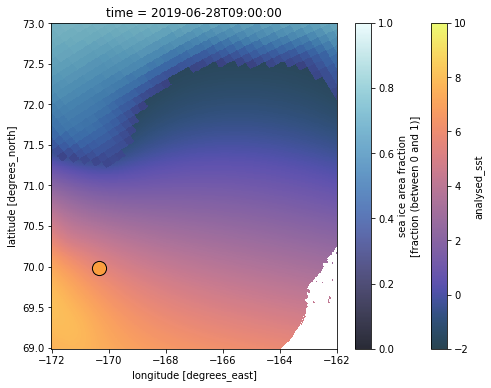

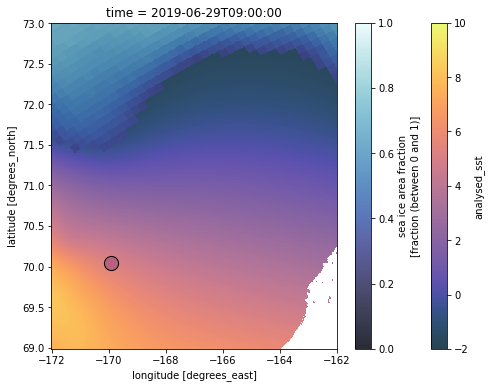

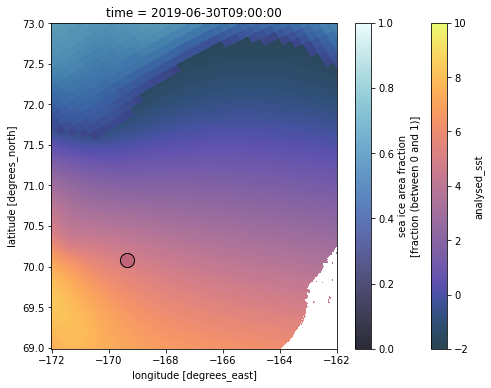

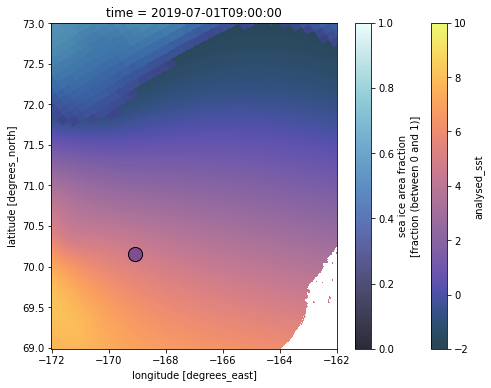

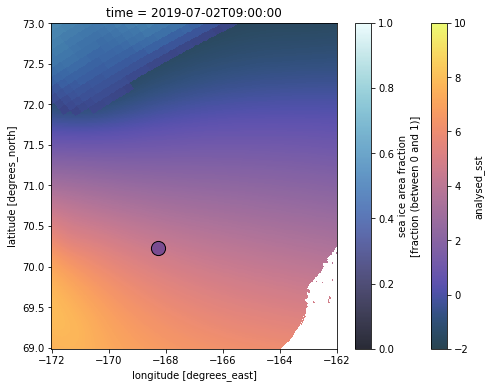

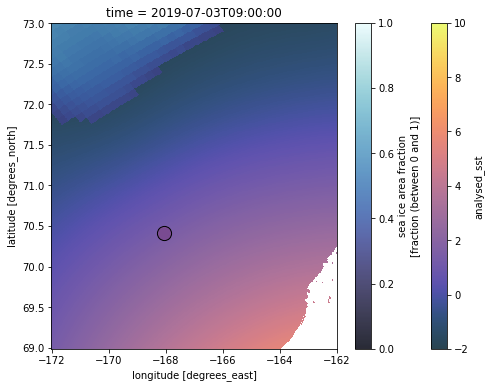

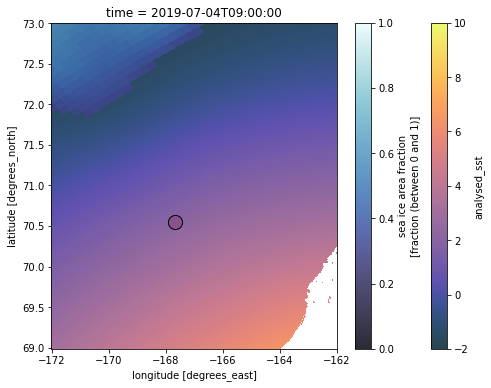

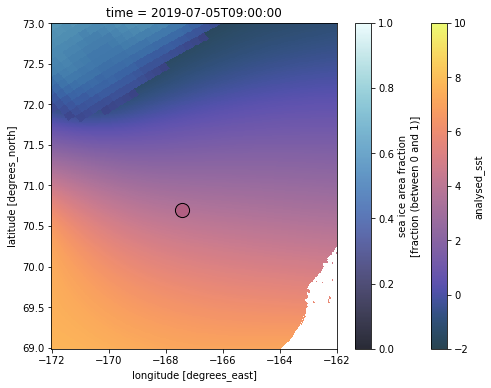

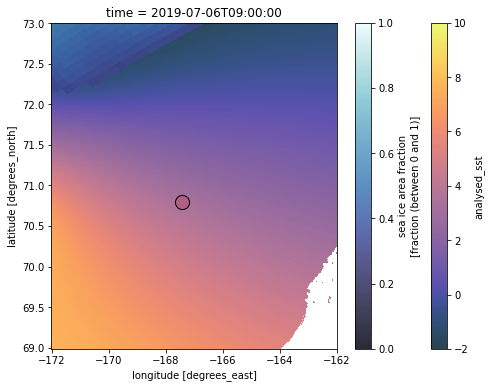

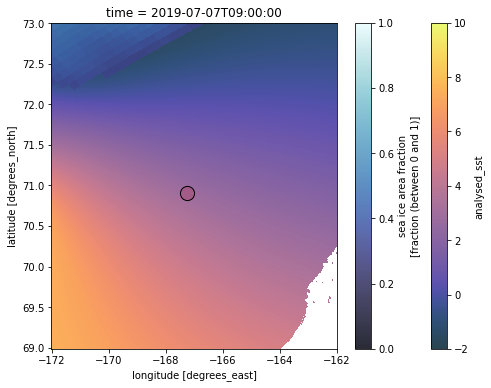

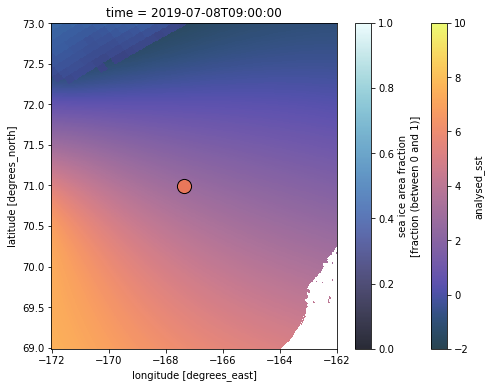

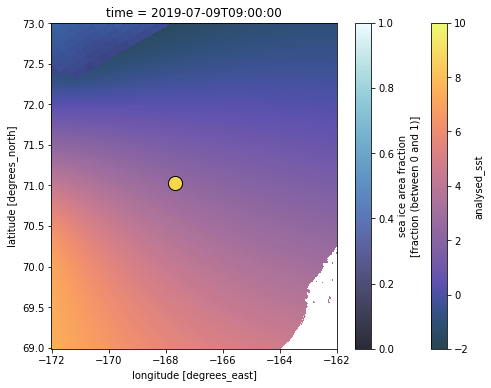

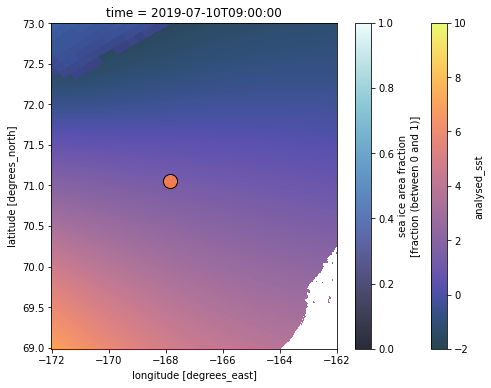

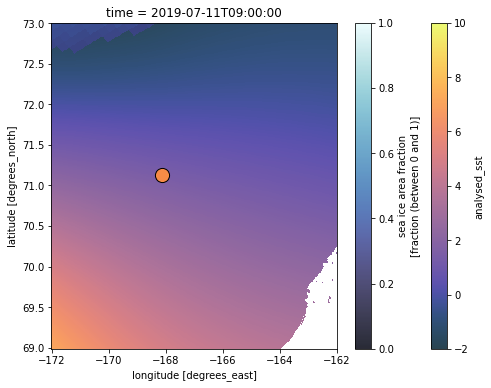

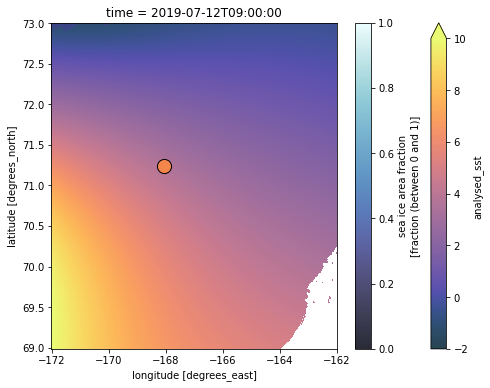

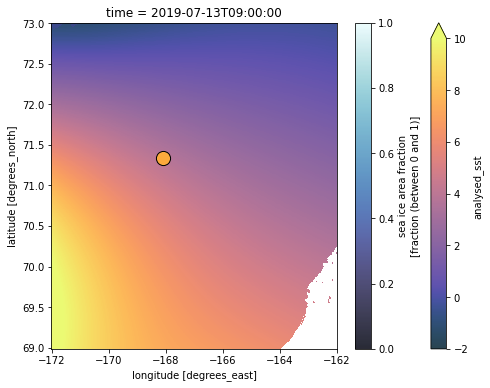

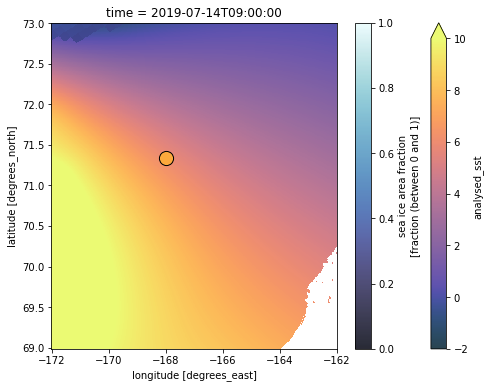

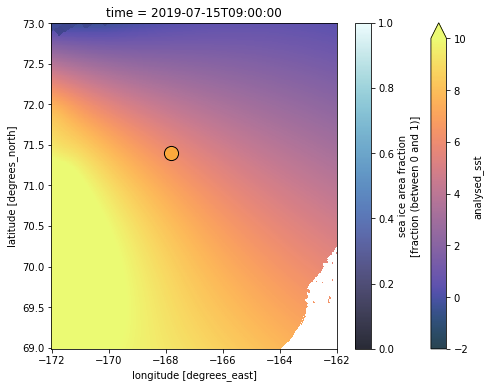

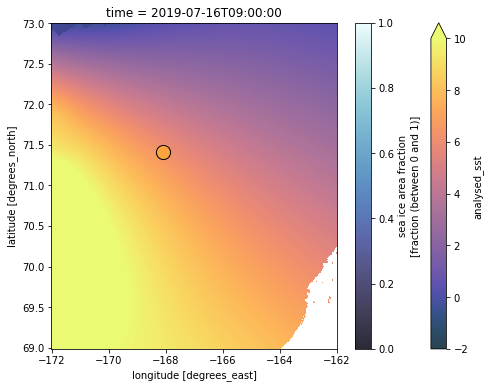

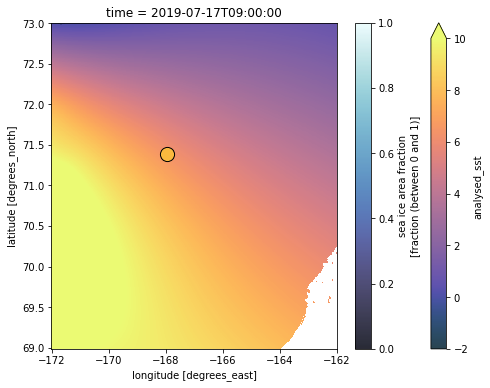

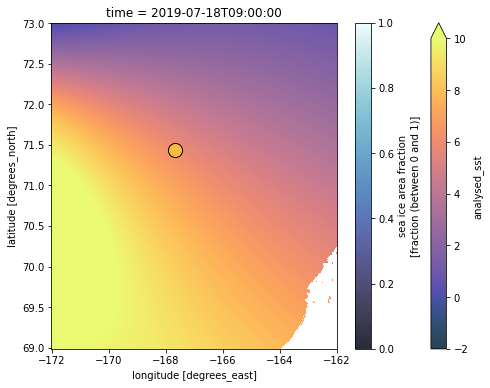

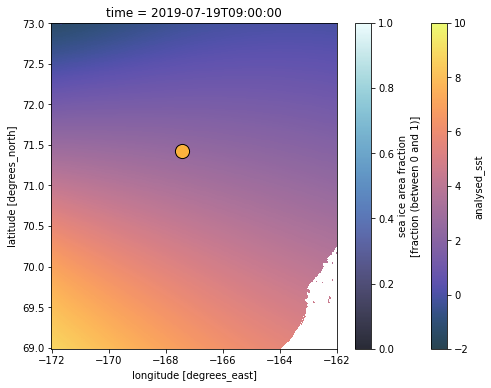

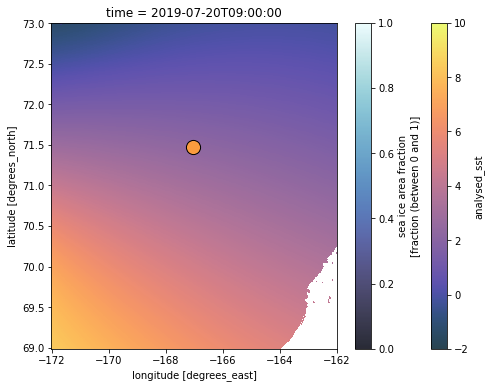

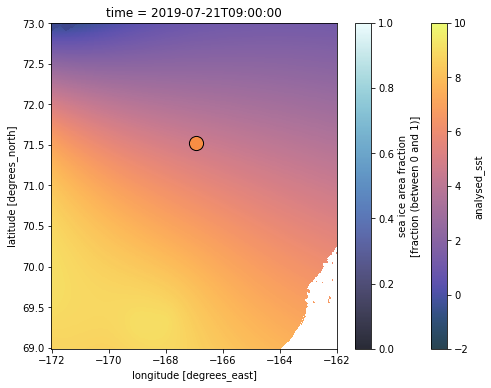

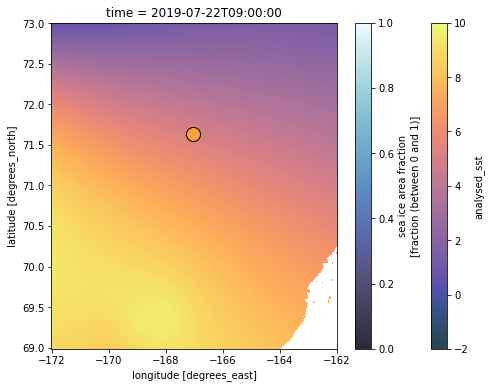

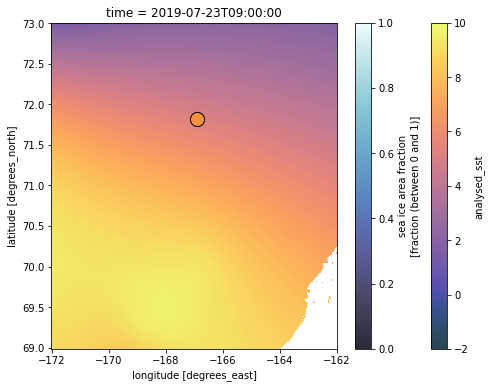

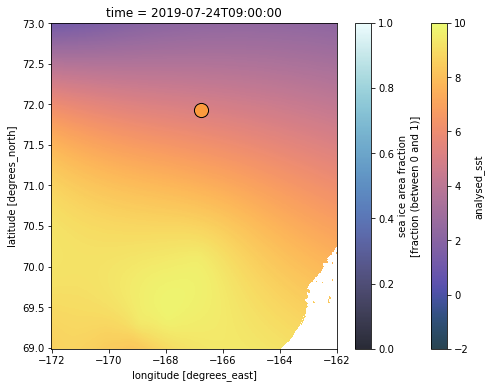

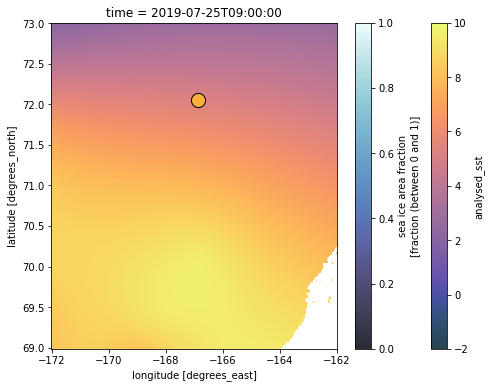

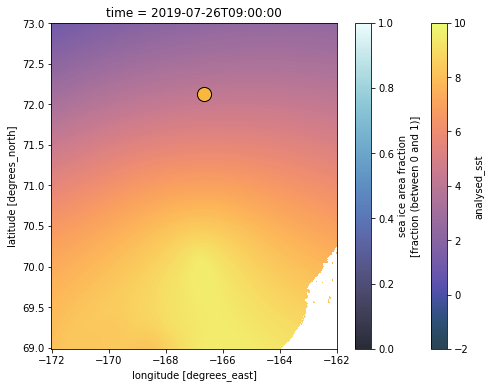

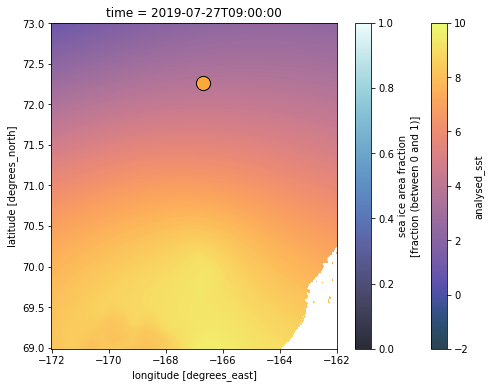

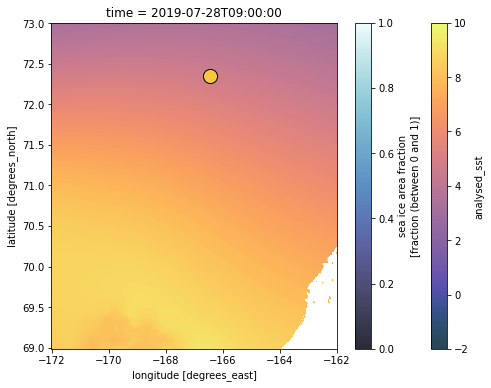

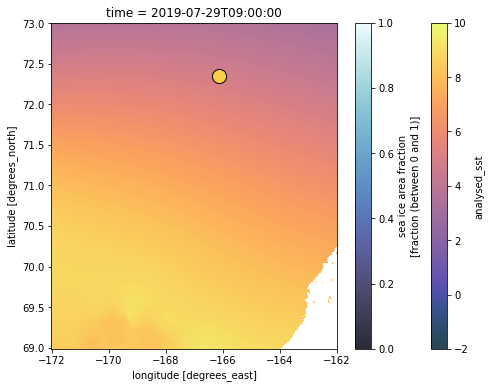

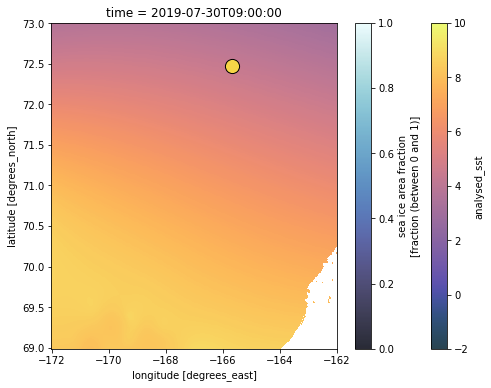

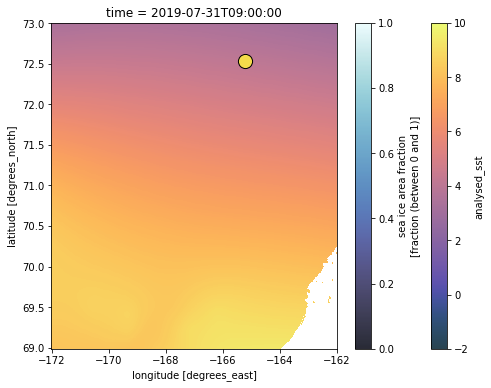

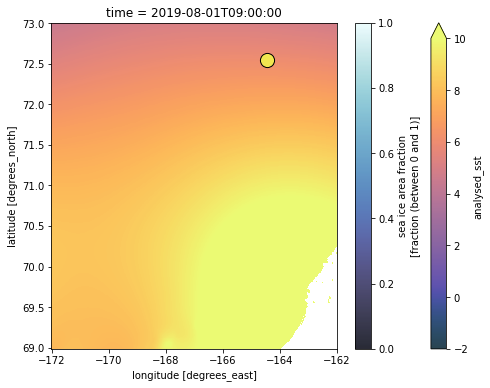

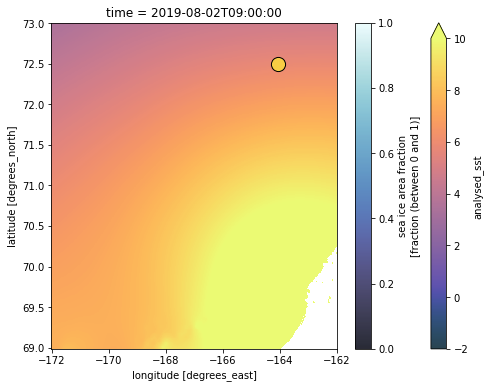

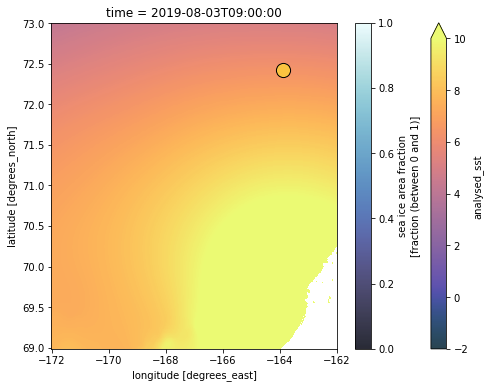

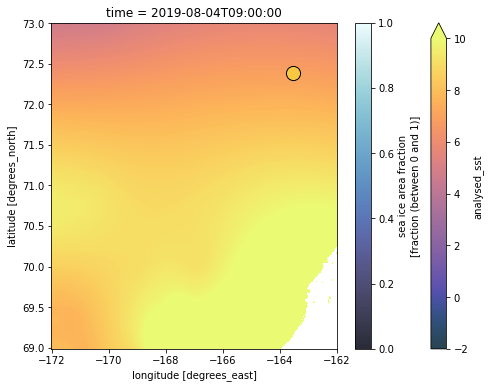

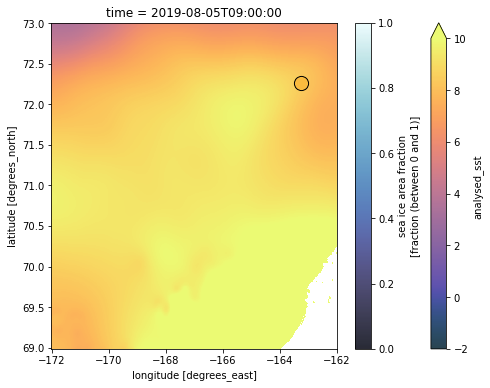

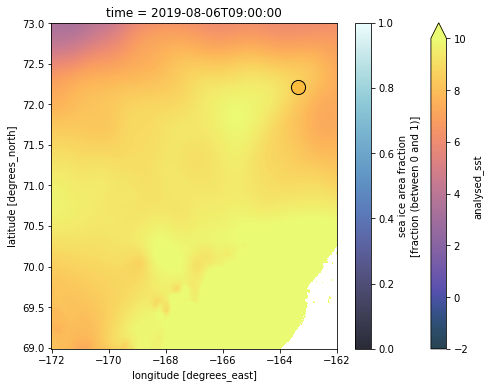

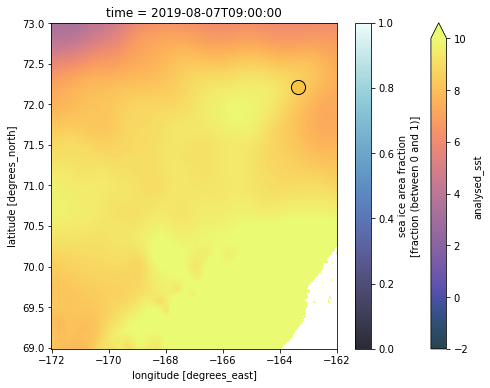

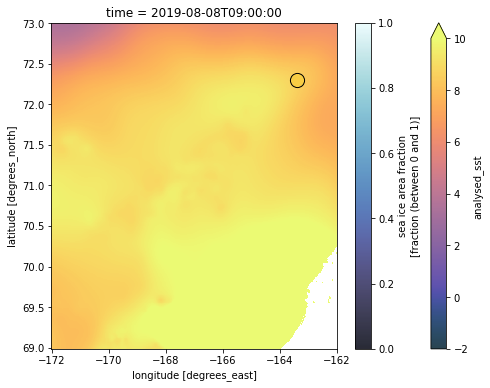

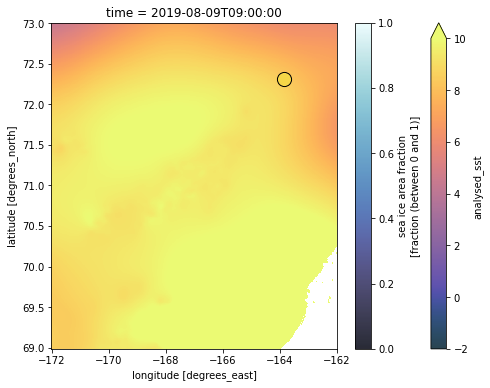

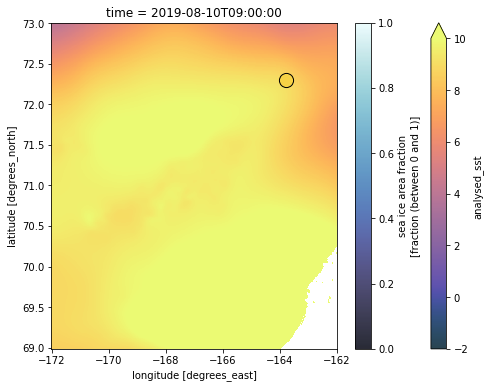

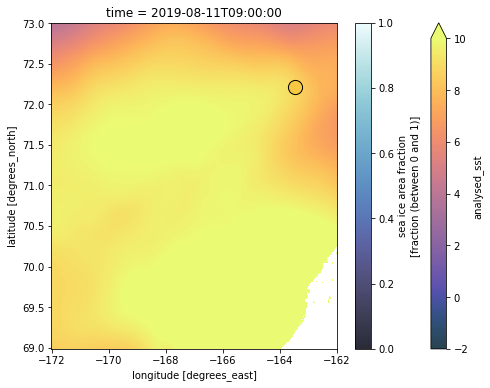

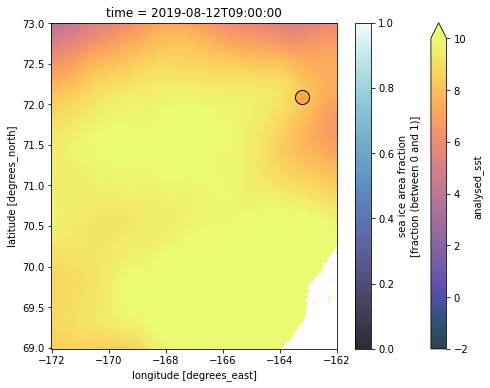

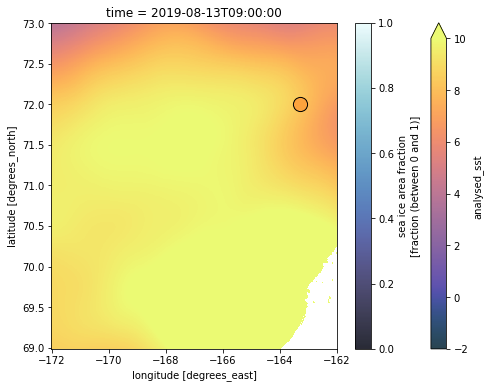

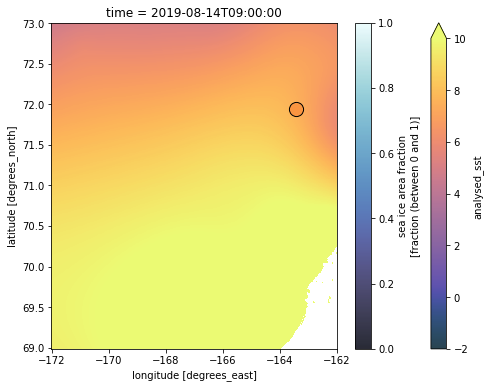

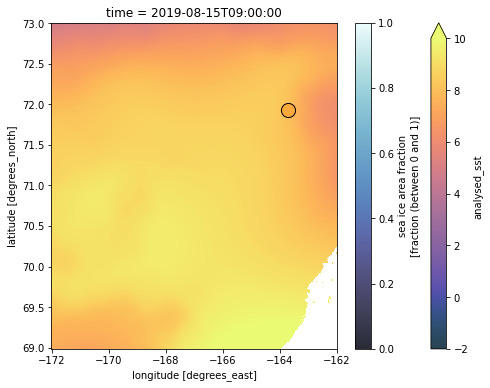

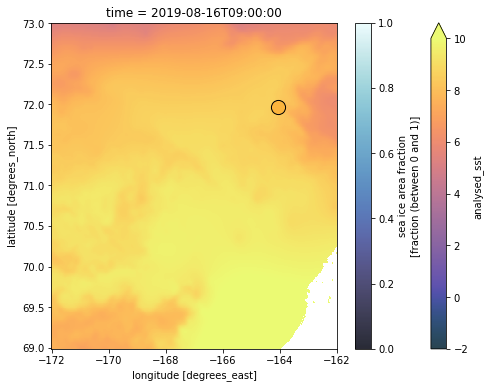

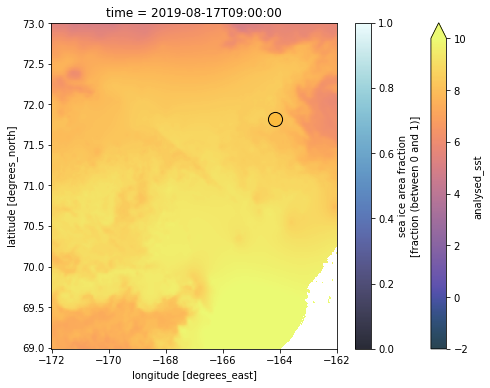

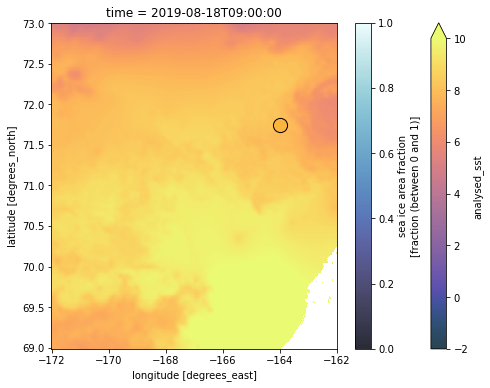

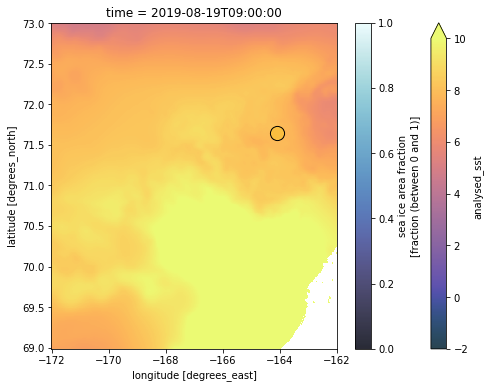

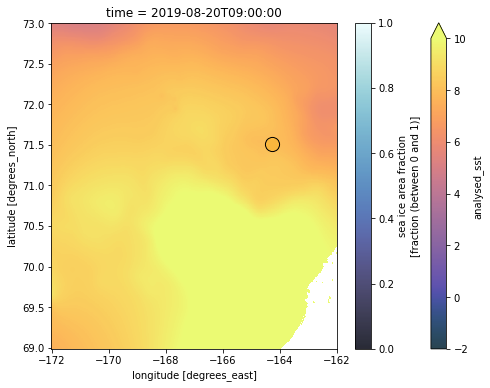

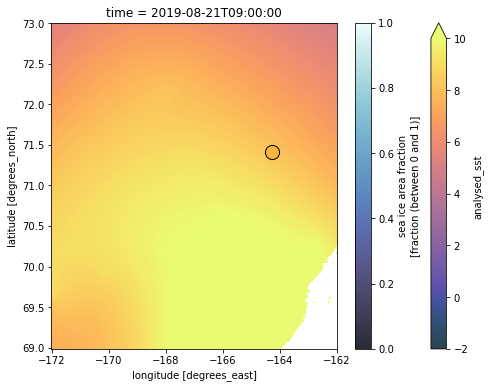

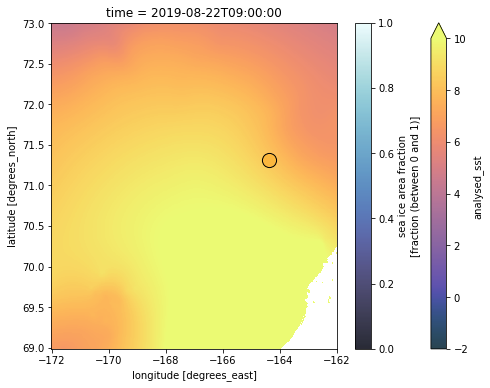

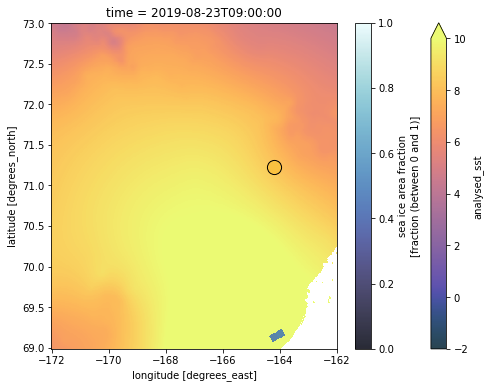

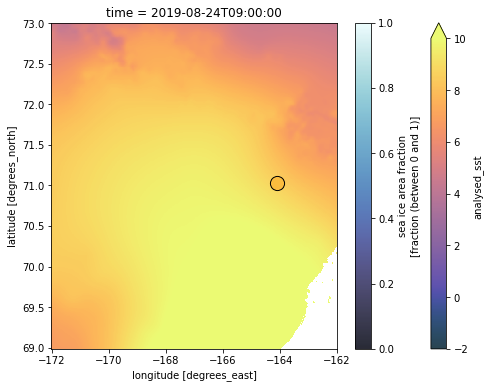

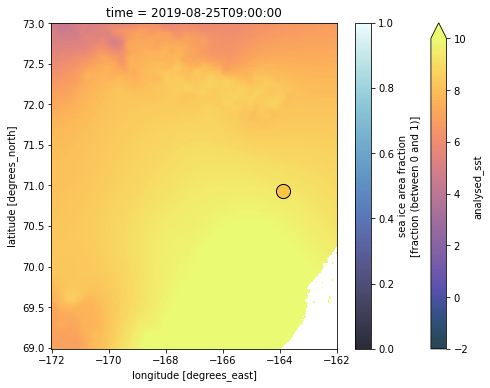

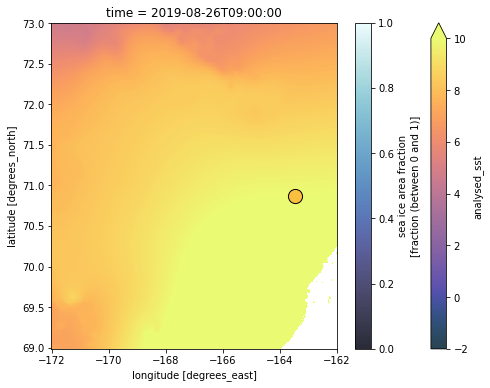

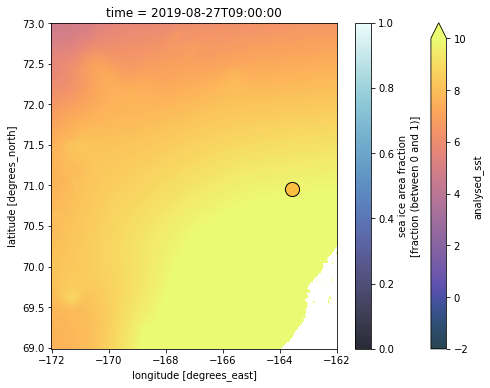

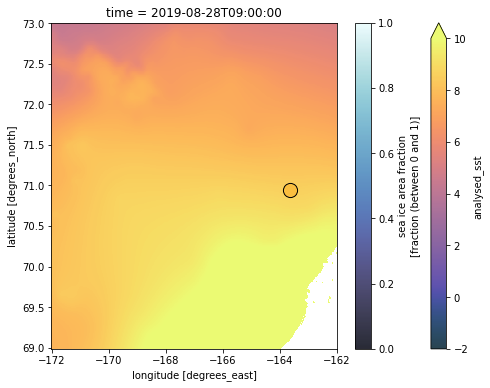

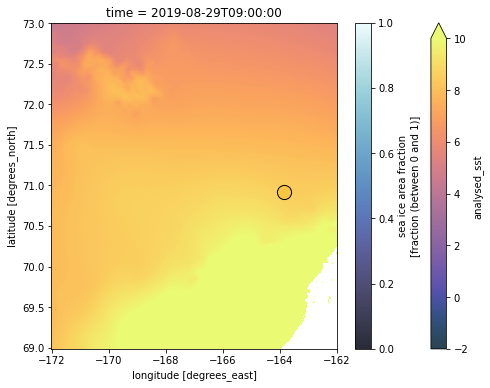

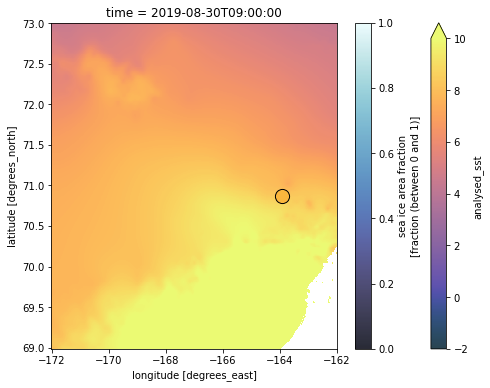

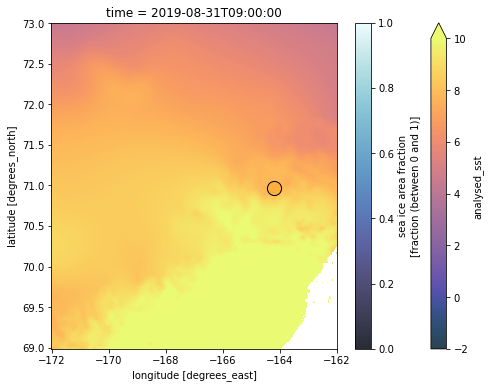

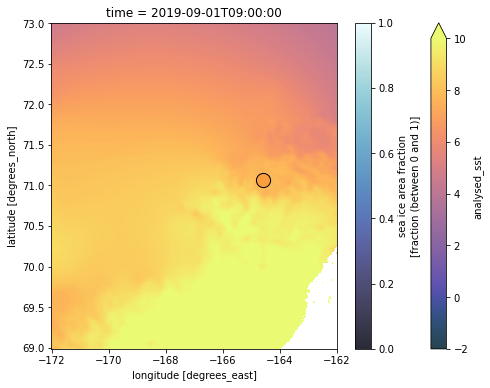

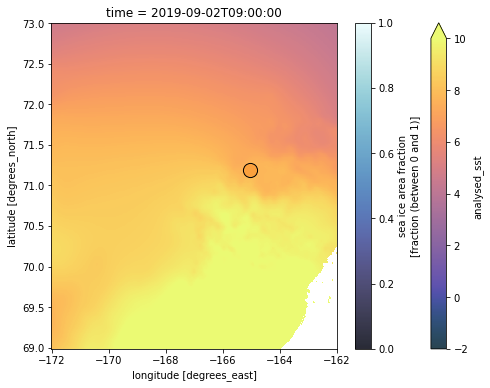

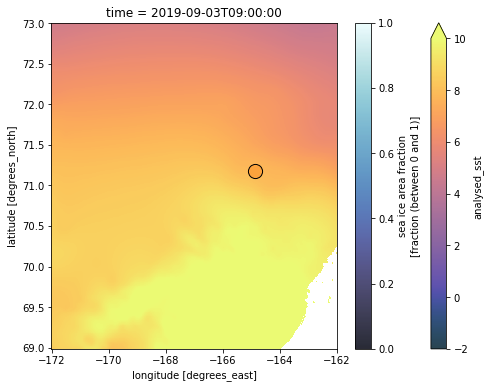

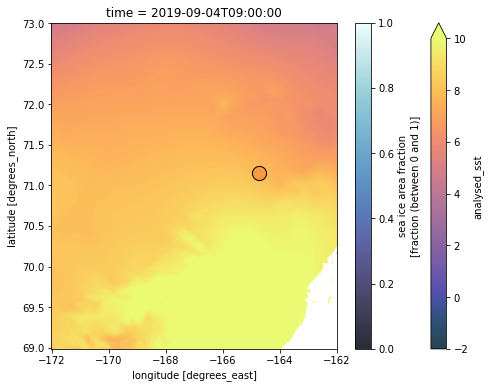

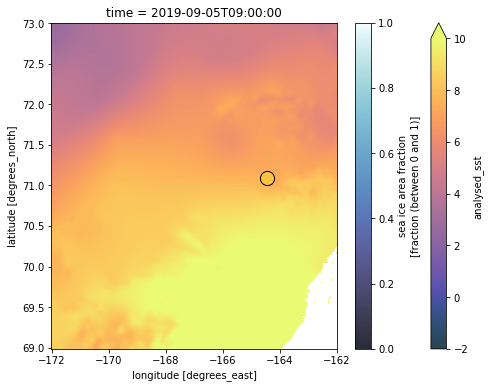

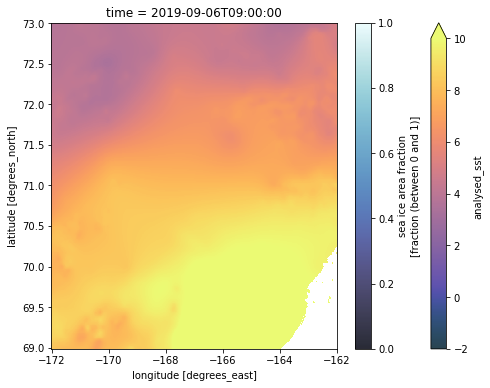

In [47]:
import matplotlib.pyplot as plt
import cmocean as cmocean
import datetime


time_start = datetime.datetime(2019,5,10)
i=0
while i<150:
    tdelt=(time_start+datetime.timedelta(days=i))
    timestr = str(tdelt.year)+'-'+str(tdelt.month)+'-'+str(tdelt.day).zfill(2)
    fig, ax = plt.subplots(1,figsize=(8, 6))
    (mdf_hres.analysed_sst-273.15).sel(time=timestr).plot(ax=ax,cmap=cmocean.cm.thermal,alpha=.85, vmin=-2, vmax=10)
    mdf_hres.sea_ice_fraction.sel(time=timestr).plot(ax=ax,cmap=cmocean.cm.ice,alpha=.85, vmin=0, vmax=1)
    ax.scatter(dfpuff_merge.loc[timestr].longitude,dfpuff_merge.loc[timestr].latitude,s=200,c=dfpuff_merge.loc[timestr].underside_temp,
               edgecolors='k',cmap=cmocean.cm.thermal,vmin=-2,vmax=10)
    fig.savefig('Popup_1240_'+timestr+'.png')
    
    i+=1

In [38]:
#get datapoint for each puff daye
dfpuff_merge['JPLsst'] = np.nan
dfpuff_merge['JPLmaskave']=np.nan
for i,row in dfpuff_merge.iterrows():
    print(i)
    dfpuff_merge.loc[i]['JPLsst'] = (mdf_hres.sel(time=i, lat=row.latitude, lon=row.longitude, method="nearest").load().analysed_sst.values)-273.15
    dfpuff_merge.loc[i]['JPLmaskave'] = (mdf_hres.sel(time=i, lat=row.latitude, lon=row.longitude, method="nearest").load().mask.values)

2019-06-30 09:00:00+00:00
2019-07-01 09:00:00+00:00
2019-07-02 09:00:00+00:00
2019-07-03 09:00:00+00:00
2019-07-04 09:00:00+00:00
2019-07-05 09:00:00+00:00


/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/core/coordinates.py:421: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  pos_indexers, new_indexes = indexing.remap_label_indexers(


2019-07-06 09:00:00+00:00
2019-07-07 09:00:00+00:00
2019-07-08 09:00:00+00:00
2019-07-09 09:00:00+00:00
2019-07-10 09:00:00+00:00
2019-07-11 09:00:00+00:00
2019-07-12 09:00:00+00:00
2019-07-13 09:00:00+00:00
2019-07-14 09:00:00+00:00
2019-07-15 09:00:00+00:00
2019-07-16 09:00:00+00:00
2019-07-17 09:00:00+00:00
2019-07-18 09:00:00+00:00
2019-07-19 09:00:00+00:00
2019-07-20 09:00:00+00:00
2019-07-21 09:00:00+00:00
2019-07-22 09:00:00+00:00
2019-07-23 09:00:00+00:00
2019-07-24 09:00:00+00:00
2019-07-25 09:00:00+00:00
2019-07-26 09:00:00+00:00
2019-07-27 09:00:00+00:00
2019-07-28 09:00:00+00:00
2019-07-29 09:00:00+00:00
2019-07-30 09:00:00+00:00
2019-07-31 09:00:00+00:00
2019-08-01 09:00:00+00:00
2019-08-02 09:00:00+00:00
2019-08-03 09:00:00+00:00
2019-08-04 09:00:00+00:00
2019-08-05 09:00:00+00:00
2019-08-06 09:00:00+00:00
2019-08-07 09:00:00+00:00
2019-08-08 09:00:00+00:00
2019-08-09 09:00:00+00:00
2019-08-10 09:00:00+00:00
2019-08-11 09:00:00+00:00
2019-08-12 09:00:00+00:00
2019-08-13 0

In [30]:
dfpuff_merge.loc['2019-07-25']

timeseries_id   dep_lat     dep_lon  pressure  \
time (UTC)                                                                 
2019-07-25 09:00:00+00:00   3.000000e+14  59.89135 -171.251817  0.040894   

                           topside_temp  topside_temp_ADC  underside_temp  \
time (UTC)                                                                  
2019-07-25 09:00:00+00:00      7.839973           18801.0        7.813907   

                           underside_temp_ADC  temp_ref       par  fluor  \
time (UTC)                                                                 
2019-07-25 09:00:00+00:00             18804.0    8527.0  7.714658    0.0   

                           tilt  latitude  longitude  CEPradius    JPLsst  \
time (UTC)                                                                  
2019-07-25 09:00:00+00:00  13.0  72.04667 -166.86598        6.0  5.205988   

                           JPLmaskave  
time (UTC)                             
2019-07-25 09:00:00+00:00         1.0

<AxesSubplot:xlabel='time (UTC)'>

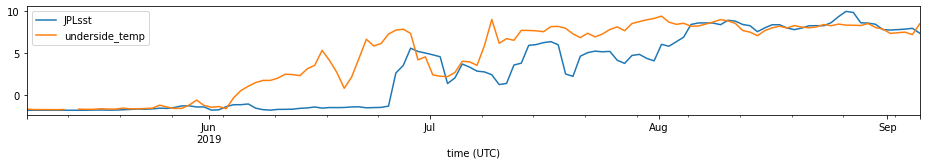

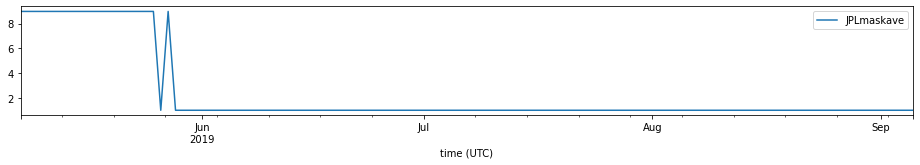

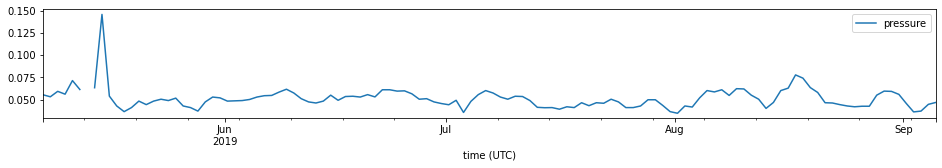

In [31]:
dfpuff_merge[['JPLsst','underside_temp']].plot(figsize=(16,2))
dfpuff_merge[['JPLmaskave']].plot(figsize=(16,2))
dfpuff_merge[['pressure']].plot(figsize=(16,2))

### Stats portion of the code

In [ ]:
(dfpuff_merge['JPLsst'] - dfpuff_merge['underside_temp']).plot(figsize=(16,2))


In [ ]:
import seaborn as sns
import statsmodels.api as sm

In [ ]:
#daily averaged 2017 mean of the differences
print(f"Mean: {(dfpuff_merge['JPLsst'] - dfpuff_merge['underside_temp']).mean()}")
print(f"STD: {(dfpuff_merge['JPLsst'] - dfpuff_merge['underside_temp']).std()}")

In [ ]:
data = dfpuff_merge.dropna(axis=0, how='any',subset=['JPLsst','underside_temp'])

y = data.JPLsst
x = sm.add_constant(data.underside_temp)

mod = sm.OLS(y, x).fit()

print(mod.summary())

In [ ]:
sns.pairplot(data=m2_merged.loc[year:year2],corner=True)

## Now look at same stats for a year with ice in region

- 2013 (never greater than 60% and sporadic
- 2012 has a smoother curve and closer to 80%
- 2017,2011 a little ice
- 2010 crazy rapid retreat?

In [ ]:
mdf_hres_m2_df.sea_ice_fraction.plot()

In [ ]:
mdf_hres_m2_df['2010':'2013'].sea_ice_fraction.plot(figsize=(12,2))

In [ ]:
server_url='http://akutan.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

dfm2c={}
for dataset_id in [
                   'datasets_Mooring_13bs2c_final',
                   'datasets_Mooring_12bs2c_final',
                   'datasets_Mooring_11bs2c_final',
                   'datasets_Mooring_10bs2c_final',
                   'datasets_Mooring_09bs2c_final',]:
    print(f'{dataset_id}')
    try:
        e = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        e.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))
        continue
    try:
        dftemp = e.to_pandas(
                            index_col='time (UTC)',
                            parse_dates=True,
                            skiprows=(1,)  # units information can be dropped.
                            )
        dftemp.columns = [x[1].split()[0] for x in enumerate(dftemp.columns)]

        ##resample as daily data 
        dfm2c.update({dataset_id: dftemp})
    except:
        pass

In [ ]:
sst_m2c = pd.DataFrame()
for mooring in sorted(list(dfm2c.keys())):
    dint = np.nan
    try:
        dint = dfm2c[mooring].depth.unique()[(dfm2c[mooring].depth.unique() > 0)].min()
        if np.isnan(dfm2c[mooring][(dfm2c[mooring].depth == dint)].temperature).all():
            dint = dfm2c[mooring].depth.unique()[(dfm2c[mooring].depth.unique() > 9)].min()
        print(dint)
        sst_m2c = pd.concat([sst_m2c,dfm2c[mooring][(dfm2c[mooring].depth == dint)].dropna(subset=['temperature'],axis=0)[['depth','temperature']]])
    except:
        print(f'{mooring} failed')

In [ ]:
sst_m2c_daily = sst_m2c.resample('1D').mean()
sst_m2c_std = sst_m2c.resample('1D').std()
sst_m2c_std.temperature.plot(figsize=(16,2))

sst_m2c_daily_hr = sst_m2c.resample('1H').mean()
sst_m2c_daily_hr = sst_m2c_daily_hr[sst_m2c_daily_hr.index.hour==9]
sst_m2c_daily_hr.index = sst_m2c_daily_hr.index.round('1D')

m2_merged = mdf_hres_m2_df.join(sst_m2c_daily)
m2_merged_hr = mdf_hres_m2_df.join(sst_m2c_daily_hr)
m2_merged.plot(figsize=(16,2))
m2_merged_hr.plot(figsize=(16,2))

In [ ]:
#choose just 2018
year = '2012-1'
year2 = '2012-4'
(m2_merged.loc[year:year2]['analysed_sst'] - m2_merged.loc[year:year2]['temperature']).plot(figsize=(16,2))
(m2_merged_hr.loc[year:year2]['analysed_sst'] - m2_merged_hr.loc[year:year2]['temperature']).plot(figsize=(16,2))

In [ ]:
m2_merged.loc[year:year2].plot(figsize=(16,2))
m2_merged_hr.loc[year:year2].plot(figsize=(16,2))

In [ ]:
m2_merged_ice = m2_merged[m2_merged.sea_ice_fraction >= 0]

In [ ]:
#daily averaged 2017 mean of the differences
m2_merged_ice
print(f"Mean: {(m2_merged_ice.loc[year:year2]['analysed_sst'] - m2_merged_ice.loc[year:year2]['temperature']).mean()}")
print(f"STD: {(m2_merged_ice.loc[year:year2]['analysed_sst'] - m2_merged_ice.loc[year:year2]['temperature']).std()}")

In [ ]:
data = m2_merged_ice.loc[year:year2].dropna(axis=0, how='any',subset=['analysed_sst','temperature'])

y = data.analysed_sst
x = sm.add_constant(data.temperature)

mod = sm.OLS(y, x).fit()

print(mod.summary())